In [89]:
import numpy as np
import pandas as pd

In [90]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [91]:
# Load the dataset
df = pd.read_csv('faithful.csv')

In [92]:
# a look at the data
df.head()
df.isna().sum()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  272 non-null    int64  
 1   eruptions   272 non-null    float64
 2   waiting     272 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 6.5 KB


In [93]:
df = df.drop('Unnamed: 0', axis=1)

In [94]:
df.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


In [95]:
df.head(30)

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
5,2.883,55
6,4.700,88
7,3.600,85
8,1.950,51
9,4.350,85


In [96]:
df.isna().sum()

eruptions    0
waiting      0
dtype: int64

In [97]:
print(df.columns)

Index(['eruptions', 'waiting'], dtype='object')


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eruptions  272 non-null    float64
 1   waiting    272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


In [99]:
df.isna().sum()

eruptions    0
waiting      0
dtype: int64

In [100]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(df[['eruptions', 'waiting']])

c:\Users\Aysenur Erdogan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Aysenur Erdogan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Aysenur Erdogan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Aysenur Erdogan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change 

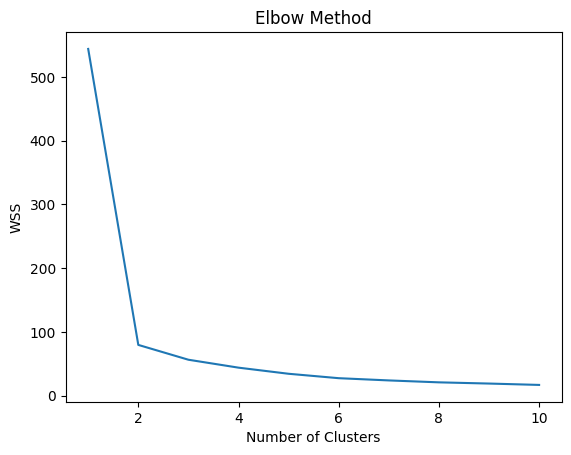

In [101]:
# Determine the optimal number of clusters using the elbow method
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)
plt.plot(range(1, 11), wss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.show()

In [102]:
# Run k-means algorithm with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(X)

c:\Users\Aysenur Erdogan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [103]:
# Add cluster labels to DataFrame
df['cluster'] = y_pred
df.head(15)

,eruptions,waiting,cluster
0,3.600,79,1
1,1.800,54,0
2,3.333,74,1
3,2.283,62,0
4,4.533,85,1
5,2.883,55,0
6,4.700,88,1
7,3.600,85,1
8,1.950,51,0
9,4.350,85,1


In [104]:
df

,eruptions,waiting,cluster
0,3.600,79,1
1,1.800,54,0
2,3.333,74,1
3,2.283,62,0
4,4.533,85,1
...,...,...,...
267,4.117,81,1
268,2.150,46,0
269,4.417,90,1
270,1.817,46,0


In [105]:
X[y_pred == 0, 0]

array([-1.48145856, -1.05750332, -0.53085085, -1.34979544, -1.45249268,
       -1.52534627, -1.1593228 , -1.52534627, -1.65700939, -1.48145856,
       -1.52534627, -1.33487362, -1.29098592, -1.42264904, -1.45249268,
       -1.40860497, -1.52534627, -1.21813233, -1.30590774, -1.45249268,
       -1.54026809, -1.59819986, -1.10139103, -1.52534627, -1.46653674,
       -1.24709821, -1.33487362, -1.32082956, -1.29098592, -0.75028938,
       -1.1593228 , -1.13035691, -1.42264904, -1.45249268, -1.42264904,
       -0.8819525 , -1.21813233, -1.42264904, -1.49638038, -1.0425815 ,
       -1.56923397, -1.02765968, -1.46653674, -0.76433344, -1.33487362,
       -1.37876133, -1.07154739, -1.42264904, -0.60370444, -1.45249268,
       -1.40860497, -1.27694185, -1.10139103, -1.32082956, -1.29098592,
       -1.48145856, -0.95480609, -1.48145856, -1.13035691, -1.30590774,
       -0.98377197, -1.36471726, -1.37876133, -1.23305415, -0.93988427,
       -1.40860497, -1.27694185, -1.45249268, -1.14527873, -1.45

In [106]:
X[y_pred == 0, 1]

array([-1.24518118, -0.6556437 , -1.171489  , -1.46625773, -1.24518118,
       -1.76102647, -1.39256555, -0.6556437 , -1.39256555, -1.46625773,
       -1.76102647, -1.171489  , -1.39256555, -1.68733429, -0.87672026,
       -0.95041244, -0.95041244, -1.31887336, -0.87672026, -1.24518118,
       -1.24518118, -0.50825933, -0.87672026, -1.68733429, -0.80302807,
       -0.43456715, -1.09779681, -0.6556437 , -0.80302807, -0.43456715,
       -1.68733429, -0.80302807, -1.53994992, -0.58195152, -1.46625773,
       -0.6556437 , -1.6136421 , -1.76102647, -1.39256555, -0.87672026,
       -0.87672026, -1.53994992, -0.87672026, -1.31887336, -1.09779681,
       -1.90841084, -1.171489  , -1.90841084, -1.09779681, -1.83471866,
       -1.46625773, -1.31887336, -0.80302807, -0.87672026, -1.6136421 ,
       -1.31887336, -0.43456715, -1.31887336, -1.90841084, -0.95041244,
       -0.58195152, -1.39256555, -1.6136421 , -1.02410463, -1.53994992,
       -1.171489  , -1.46625773, -1.83471866, -1.171489  , -1.02

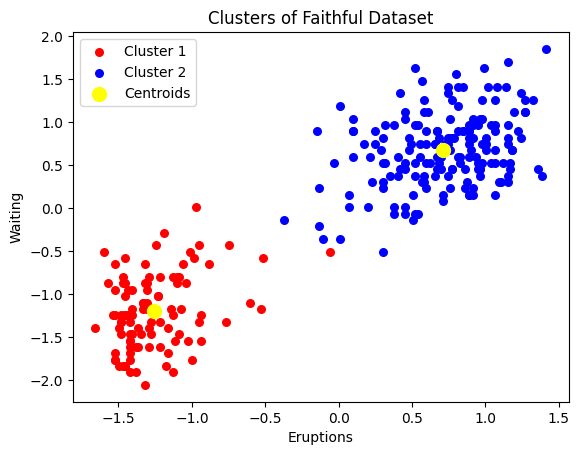

In [107]:
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s=30, c='red', label='Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s=30, c='blue', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('Clusters of Faithful Dataset')
plt.xlabel('Eruptions')
plt.ylabel('Waiting')
plt.legend()
plt.show()